In [112]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [113]:
# Load the Titanic dataset from the specified file path and set 'PassengerId' as the index
df=pd.read_csv(r"/Users/deepakraj/Desktop/Titanic.csv",index_col='PassengerId')

# Drop rows with missing values from the dataset
df.dropna(inplace=True)

In [114]:
# Display the first 5 rows of the dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,Male,22.0,1,0,7.2500,3
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,3
4,1,1,female,35.0,1,0,53.1000,3
5,0,3,Male,35.0,0,0,8.0500,3


In [115]:
# Check for duplicate entries in the dataset
df.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887     True
888    False
889    False
890    False
891    False
Length: 889, dtype: bool

In [116]:
# Show Basic Statistics 
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [117]:
# Calculate the Pearson Correlation between numerical columns to see how they are related to each other
df.corr(method='pearson', numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.116558,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,-0.122449,0.081656,0.016824,-0.548193,0.164681
Age,-0.116558,-0.122449,1.000000,-0.156777,-0.215191,-0.003307,-0.124894
SibSp,-0.034040,0.081656,-0.156777,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.215191,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.003307,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,-0.124894,0.068900,0.040449,-0.226311,1.000000


In [118]:
# Check how skewed the data is
skew_df=df.skew(numeric_only=True)
skew_df.head()

Survived    0.484568
Pclass     -0.636998
Age         0.104457
SibSp       3.691058
Parch       2.745160
dtype: float64

In [119]:
# Calculate the Kurtosis of numerical columns to understand how much the data distribution is peaked or flat
kurt_df=df.kurt(numeric_only=True)
kurt_df.head()

Survived    -1.769179
Pclass      -1.269437
Age         -1.016639
SibSp       17.838972
Parch        9.750592
dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap of Titanic Dataset')

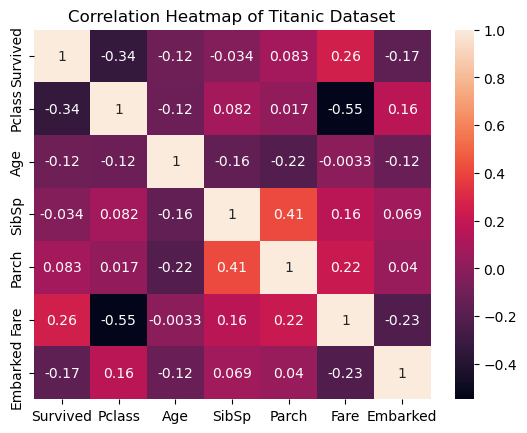

In [120]:
# Get the correlation between numerical columns and store it in a new dataframe
"""
The Pearson Correlation method is used to measure the linear relationship between numerical columns in the dataset.
"""
titanic_data_corr=df.corr(method='pearson', numeric_only=True)
titanic_df=pd.DataFrame(titanic_data_corr)

# Create a Heatmap to visually see how different columns are correlated with each other
"""
   - A heatmap is created to provide a visual representation of the correlation matrix.
   - Each square in the heatmap shows the correlation value between 2 rows.
   - Darker colors indicate stronger correlations, while lighter colors represent weakwer correlations.
"""
sns.heatmap(titanic_df, annot=True)
plt.title('Correlation Heatmap of Titanic Dataset')

In [121]:
# Calculate the percentage of male and female passengers in the dataset
df_gender=round(df['Sex'].value_counts()/df.shape[0]*100,1).reset_index()
df_gender.columns=['Sex','Counts']
print(df_gender)

      Sex  Counts
0    Male    64.9
1  female    35.1


In [122]:
# Group the data by 'Embarked' & 'Sex' then calculate the average fare for each group
df_gender=df.groupby(['Embarked','Sex'])['Fare'].mean().reset_index(name='Fare_count')
df_grp=pd.DataFrame(df_gender)

# Split the data into two groups (Male & Female) to make separate plots for each
male_cnt=df_grp[df_grp['Sex']=='Male']
female_cnt=df_grp[df_grp['Sex']=='female']
print(df_gender)

   Embarked     Sex  Fare_count
0         1    Male   48.262109
1         1  female   75.169805
2         2    Male   13.838922
3         2  female   12.634958
4         3    Male   21.711996
5         3  female   38.740929


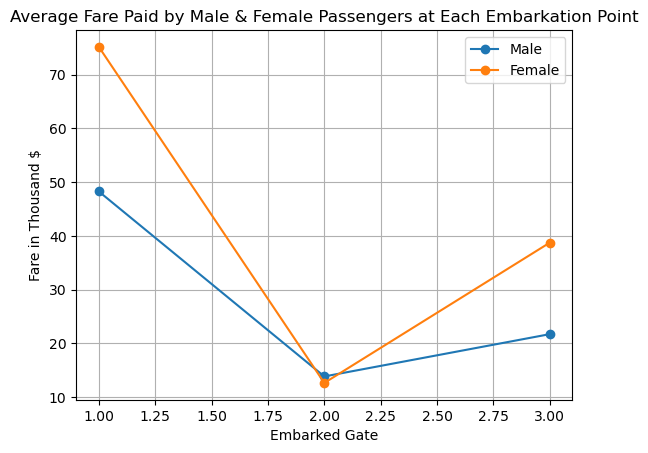

In [123]:
# Plot the average fare paid by male and female passengers for each embarkation point
"""
    - This section visualizes the average fare paid by male and female passengers at each embarkation point.
    - 2 separate line plots are created:
        - One for male passengers (male_cnt['Fare_count'] showing their average fare across different embarkation point.
        - Another one for female passengers (female_cnt['Fare_count'] showing their average fare across different embarkation point.
"""
plt.plot(male_cnt['Embarked'],male_cnt['Fare_count'],marker='o',label='Male')
plt.plot(female_cnt['Embarked'],female_cnt['Fare_count'],marker='o',label='Female')
plt.xlabel('Embarked Gate')
plt.ylabel('Fare in Thousand $')
plt.title('Average Fare Paid by Male & Female Passengers at Each Embarkation Point')
plt.grid(True)
plt.legend()
plt.show()

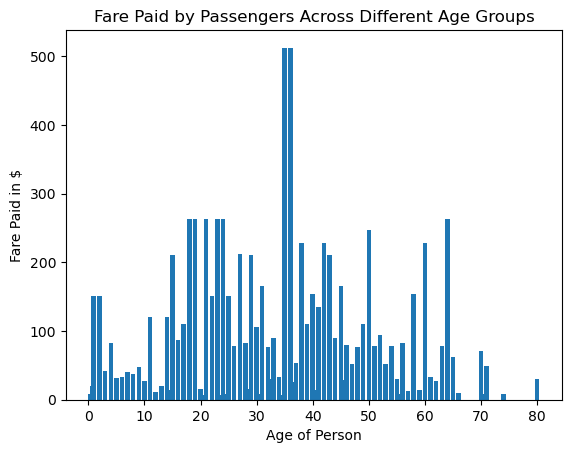

In [124]:
# Plot a bar chart showing the relationship between the passengers ages and the fares they paid
"""
    - This code visualizes the relationship between passengers ages and the fares they paid.
    - The bar chart is used where:
        - The x-axis (df['Age']) represents the age of each passenger.
        - The y-axis (df['Fare']) represents the fare each passenger paid.
"""
plt.bar(x=df['Age'],height=df['Fare'])
plt.xlabel('Age of Person')
plt.ylabel('Fare Paid in $')
plt.title('Fare Paid by Passengers Across Different Age Groups')
plt.show()